## Aim:

Write a program in Python to predict the class of a flower based on available attributes.

## Theory:

#### What is Machine learning?
- Machine learning (ML) is defined as a discipline of artificial intelligence (AI) that provides machines the ability to automatically learn from data and past experiences to identify patterns and make predictions with minimal human intervention.
- Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so.  
- Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.

#### Dataset Used:
We will use IRIS dataset for this experiment  
This dataset has 3 classes:
1. Iris Setosa  
2. Iris Versicolour  
3. Iris Virginica  

### Steps Involved:
1. Setting up the environment.
2. Loading the Dataset.
3. Analysing the Dataset.
4. Data Visulization.
5. Model Building  

### 1. Setting up the Environment:

First, we need to install the libraries used for this Lab.

In [ ]:
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install sklearn

Importing the libraries required:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

___

### 2. Loading the dataset:
Now, we load the csv file as a pandas dataframe.

In [3]:
file_location = "/home/ayan/Documents/Iris.csv"
df = pd.read_csv(file_location)

#### `df.head()` and `df.tail()`
- We can print the first 5 rows of the dataframe using `head()` function.

In [4]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can also print the last 5 rows of the dataframe using `tail()` function

In [5]:
df.tail()

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.reset_index(inplace=True)
df.head()

,index,sepallength,sepalwidth,petallength,petalwidth,class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


___

### 3. Analyzing the dataset:

- We can print some info of the dataframe using `.info()` attribute.  
This returns info like column names, number of not-null 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        150 non-null    int64  
 1   sepallength  150 non-null    float64
 2   sepalwidth   150 non-null    float64
 3   petallength  150 non-null    float64
 4   petalwidth   150 non-null    float64
 5   class        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- `df.shape` function provides with the number of entries in each dimension of the pandas dataframe:

In [8]:
df.shape

(150, 6)

#### `df.describe()` 
Gives statistic info about the dataframe such as  
- Number of tuples (`count`)
- Value for a particular percentile for all the columns using `percentiles` parameter.   
    By default, we get the 25th, 50th and 75th percentile values.
- Minimum and Maximum values.
- Mean value
- Standard Deviation
> by default, describe() function excludes columns which contain string values

In [9]:
df.describe()

,index,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


We can also use `describe()` method on a single column of the dataframe:

In [10]:
df[['class']].describe()

,class
count,150
unique,3
top,Iris-setosa
freq,50


In [11]:
df.dtypes

index            int64
sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

- We need to make sure that there are no null values in our dataset.  
To do so we make use of `isnull()` function which returns True/False depending on whether the cell contains a value or not

In [12]:
df.isnull()

,index,sepallength,sepalwidth,petallength,petalwidth,class
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


But it's still difficult to find out the amount of `NULL` values in the dataframe.  
To do so, we can simply get the sum of the `df.isnull()` dataframe which will provide us with the number of null values in each column of the dataframe

In [13]:
df.isnull().sum()

index          0
sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

As we can see, there are no null values in the dataframe

- `df.columns`: used to change attribute/column names

Changing the column/attribute names of the pandas dataframe:

In [14]:
df.columns = ['s_no.', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

As we can see the name of the columns have been changed

- `df['column_name'].value_counts()`: will display the number of times unique entries in a particular column/attribute are displayed

In [15]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

___

### 4. Data Visualization

We will create pairplots and box plots for visualization purpose.  
> ##### PAIRPLOT:  
A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.  

We make use of seaborn library's `pairplot()` function which makes plots by taking a pair of attributes/columns of the dataframe.  
- We set the hue as 'type' so as to get different colours for different species of flowers. 

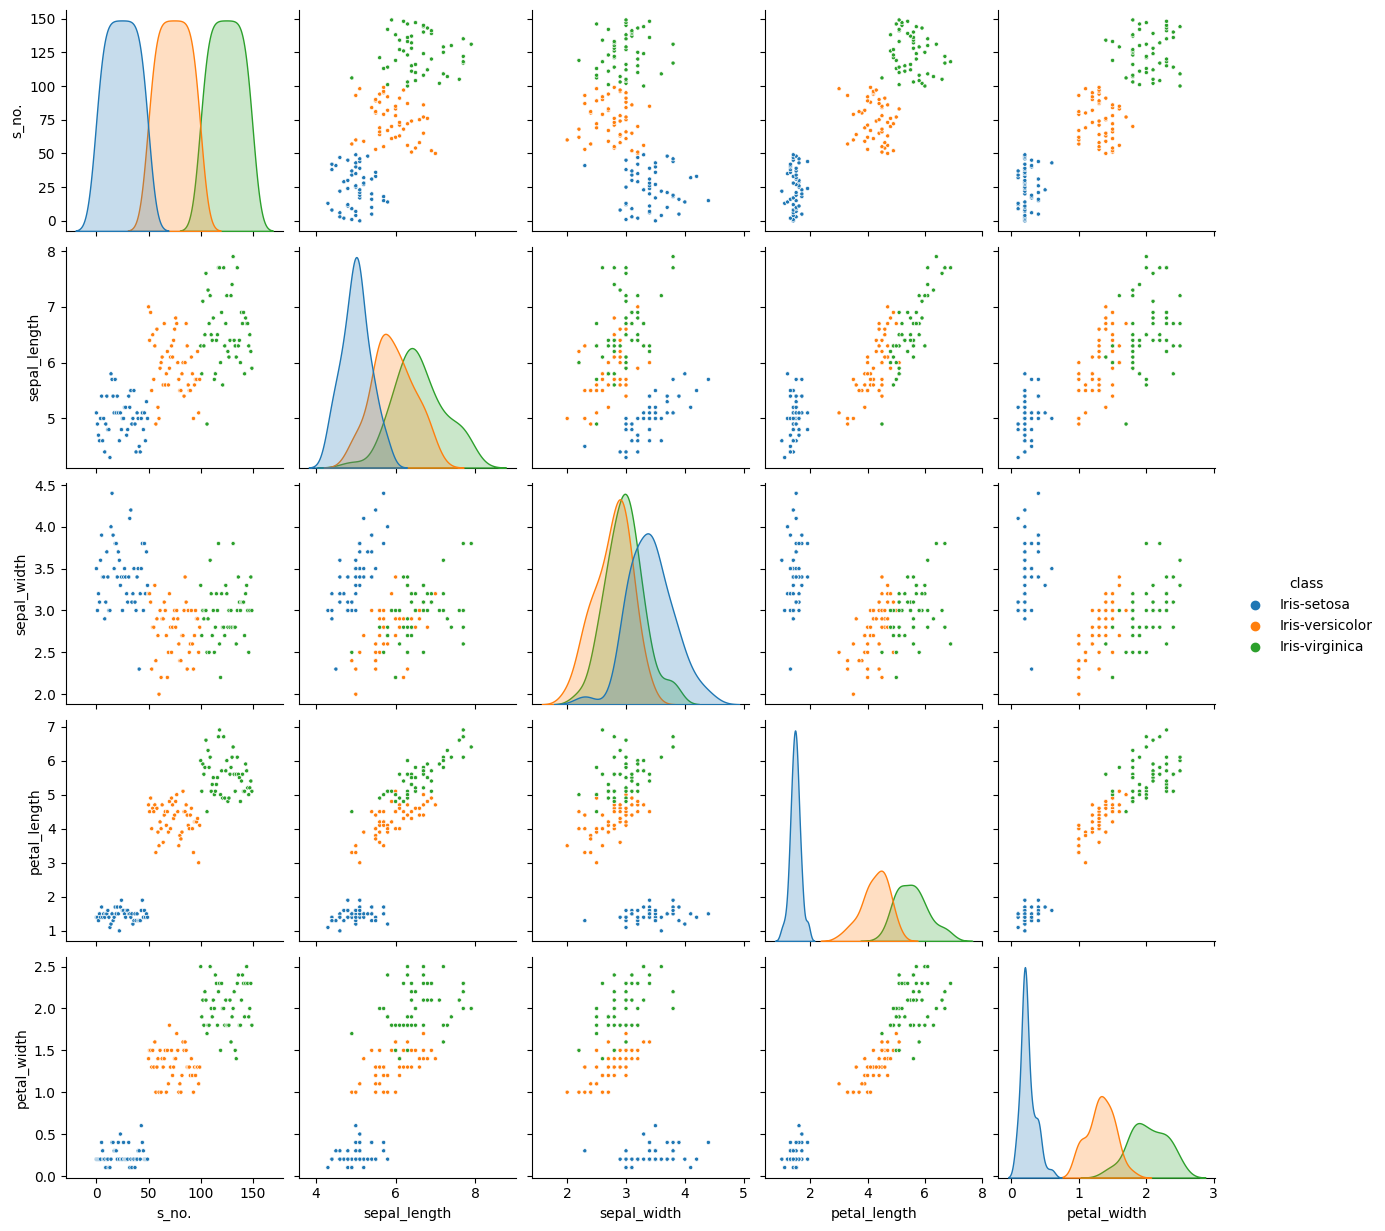

In [16]:
sns.pairplot(df,hue='class', markers = '.')
plt.show()

> #### BOX PLOT
A box plot is a chart that shows data from a five-number summary including one of the measures of central tendency.
That means box or whiskers plot is a method used for depicting groups of numerical data through their quartiles graphically. 
It helps to find out how much the data values vary or spread out with the help of graphs. As we need more information than just knowing the measures of central tendency, this is where the box plot helps.

A box plot consists of the following:
1. Minimum: The minimum value in the given dataset
2. First Quartile (Q1): The first quartile is the median of the lower half of the data set.
3. Median: The median is the middle value of the dataset, which divides the given dataset into two equal parts. The median is considered as the second quartile.
4. Third Quartile (Q3): The third quartile is the median of the upper half of the data.
5. Maximum: The maximum value in the given dataset.

Apart from these five terms, the other terms used in the box plot are:
- **Interquartile Range (IQR)**: The difference between the third quartile and first quartile is known as the interquartile range. (i.e.) IQR = Q3-Q1
- **Outlier**: The data that falls on the far left or right side of the ordered data is tested to be the outliers.

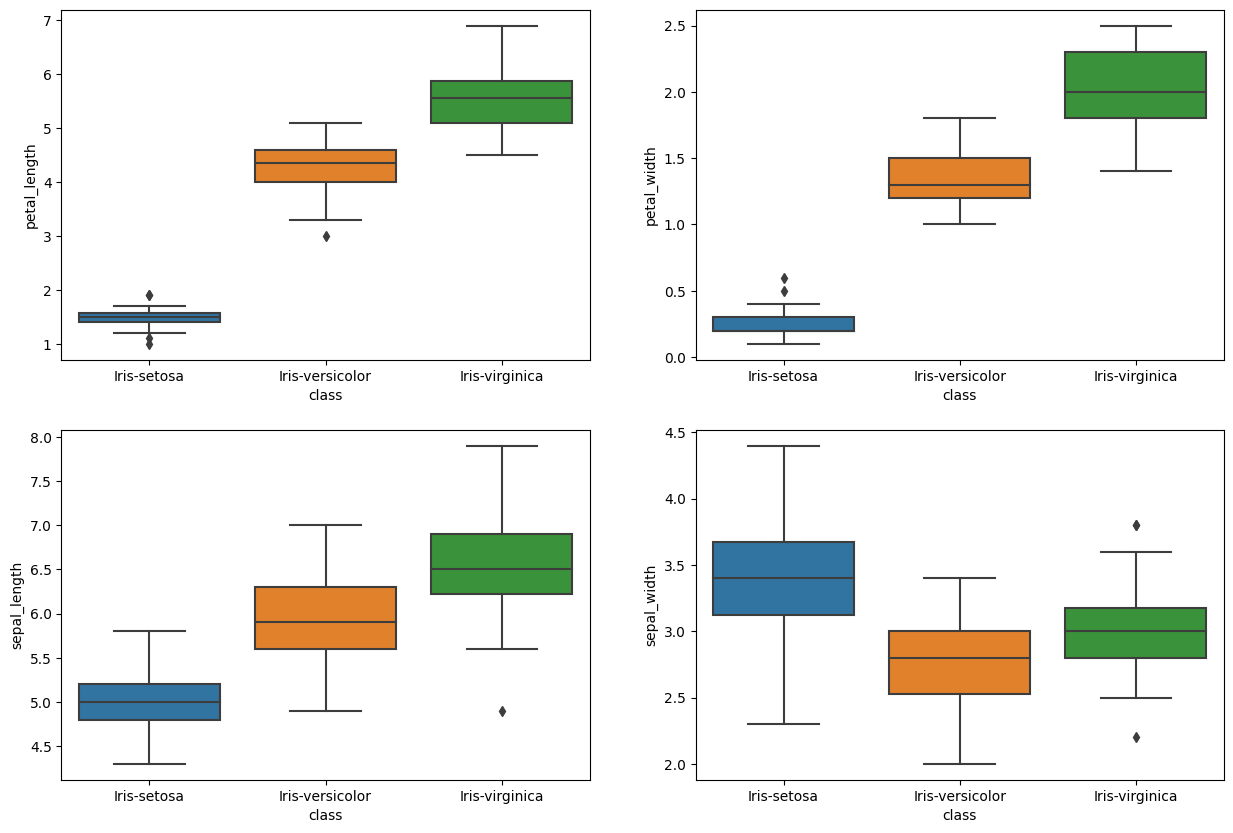

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='class',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='class',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='class',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='class',y='sepal_width',data=df)
plt.show()

___

### 5. Model Building

#### SciKitLearn or SKLearn
It is one of the most powerful or robust python library and provides tool for machine learning and statistical modelling such as classification, clustering, dimensionality deduction etc.

We will use `Logistic Regression` here.

Importing the necessary libraries:

In [18]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression

Now, we split our dataframe into 2:
1. One which consists of the independent variables.
2. Another which consists of the dependent variable (class).

In [19]:
X = df.drop(['class'],axis=1)
Y = df['class']

For testing and training of our model,  
we will split the dataset into a ratio of 80:20 with 80% data used for training the model and remaining 20% for testing it.

In [20]:
X_train, X_test, Y_train, Y_test = tts(X,Y,test_size=20)

To see the shape of data split for testing and training:

In [21]:
print('shape of training data : ',X_train.shape)
print('shape of testing data',X_test.shape)

shape of training data :  (130, 5)
shape of testing data (20, 5)


Creating an object of the model:

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Now, we test the model by predicting the class of test data.

In [23]:
Z = model.predict(X_test)

Getting the accuracy score of the trained model:

In [24]:
from sklearn.metrics import accuracy_score
print('Model Accuracy is: ',accuracy_score(Y_test, Z))

Model Accuracy is:  1.0


## Conclusion:
Iris.csv dataset has been loaded, analyzed, visualized and used to train logistic regression model for which we got an accuracy of `100%`.